<a href="https://colab.research.google.com/github/vanshhika-kaurani/lead-scoring-app/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [3]:
import kagglehub
import os
import pandas as pd

# Download the dataset
path = kagglehub.dataset_download("amritachatterjee09/lead-scoring-dataset")

# Print available files to locate the CSV
print("Files in dataset folder:", os.listdir(path))

df = pd.read_csv(os.path.join(path, "Lead Scoring.csv"))
df.head()



100%|██████████| 411k/411k [00:00<00:00, 79.9MB/s]

Extracting files...
Files in dataset folder: ['Leads Data Dictionary.xlsx', 'Lead Scoring.csv']


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#data cleaning

In [5]:
df = df.drop(['Prospect ID', 'Lead Number'], axis=1)


In [6]:
df.replace("Select", np.nan, inplace=True)
df.replace("No", np.nan, inplace=True)
df.replace("", np.nan, inplace=True)

# Drop columns with too many missing values (>30%)
null_percent = df.isnull().mean()
cols_to_drop = null_percent[null_percent > 0.3].index
df.drop(cols_to_drop, axis=1, inplace=True)

# For remaining missing values, fill with mode or median
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)


<ipython-input-6-2309302380>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("No", np.nan, inplace=True)
<ipython-input-6-2309302380>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-6-2309302380>:15: FutureWarning: A value 

In [7]:
#Encoding Categorical Variables

from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary or ordinal columns (if they exist)
le = LabelEncoder()
binary_cols = ['Do Not Email', 'Do Not Call']

for col in binary_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f" Column '{col}' not found. Skipping...")

# One-Hot Encoding for remaining categorical variables
df = pd.get_dummies(df, drop_first=True)



 Column 'Do Not Email' not found. Skipping...
 Column 'Do Not Call' not found. Skipping...


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# only existing columns are scaled
existing_numerical_cols = [col for col in numerical_cols if col in df.columns]
df[existing_numerical_cols] = scaler.fit_transform(df[existing_numerical_cols])

In [9]:
# Training and Testig Part

In [10]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop('Converted', axis=1)
y = df['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7976190476190477

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1107
           1       0.77      0.70      0.74       741

    accuracy                           0.80      1848
   macro avg       0.79      0.78      0.79      1848
weighted avg       0.80      0.80      0.80      1848



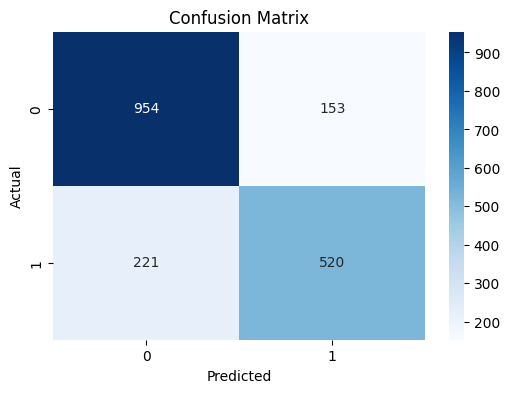

In [13]:
# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


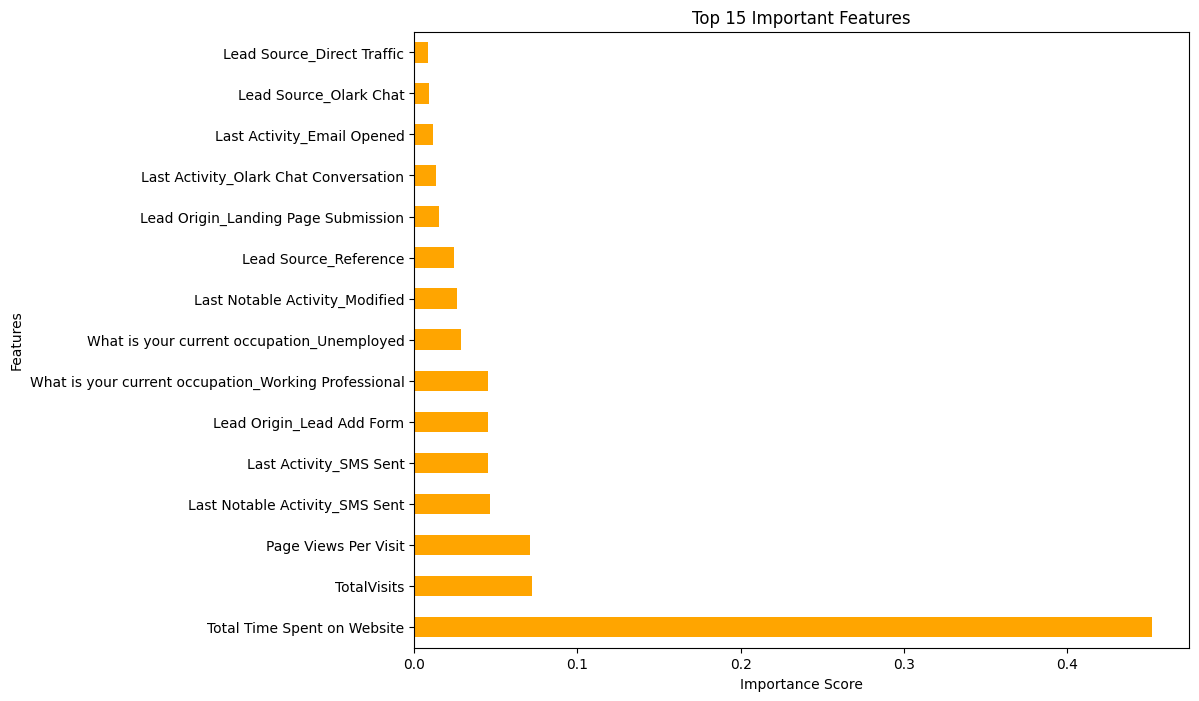

In [14]:
# Feature Importance
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 8))
importances.nlargest(15).plot(kind='barh', color='orange')
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [29]:
# Generate requirements.txt
!pip freeze > requirements.txt


In [30]:
from google.colab import files
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd

st.title("Lead Scoring Dashboard")

# Example (You can replace with your model and data logic)
df = pd.DataFrame({
    'Lead Source': ['Website', 'Referral', 'Social Media'],
    'Converted': [1, 0, 1]
})

st.dataframe(df)


Writing streamlit_app.py
